<a href="https://colab.research.google.com/github/sowiexsker894/FDS-2024-2-CC51/blob/main/upc_pre_2024_02_secci%C3%B3n_nro_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upc-pre-2024-02-SC51-grupo1-tf

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
#carga de datos
df = pd.read_csv('/content/drive/MyDrive/Final Data Science /USvideos_cc50_202101.csv')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,Oregon,44.000000,-120.500000,POINT (-120.5 44)
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Colorado,39.113014,-105.358887,POINT (-105.358887 39.113014)
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Louisiana,30.391830,-92.329102,POINT (-92.32910200000001 30.39183)


In [18]:
#descripcion de los datos
df = pd.read_csv('/content/drive/MyDrive/Final Data Science /USvideos_cc50_202101.csv')
df.dtypes


,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,object
tags,object
views,int64
likes,int64
dislikes,int64


In [19]:
#DESCRIPCION DE LOS DATOS
num_variables = len(df.columns)
print(f"\nTotal number of variables: {num_variables}")


variable_descriptions = {
    "video_id": "Identificador de cada video.",
    "trending_date": "Fecha de tedencia.",
    "title": "Titulo de cada video.",
    "channel_title": "Nombre del canal.",
    "category_id": "ID de la categoria.",
    "publish_time": "Fecha de publicaciony hora de la publicacion.",
    "tags": "Etiquetas del video.",
    "views": "Numero de vistas.",
    "likes": "Numero de likes.",
    "dislikes": "Numero de dislikes.",
    "comment_count": "Numero de comentarios.",
    "thumbnail_link": "Link de la miniatura.",
    "comments_disabled": "Indica si los comentarios estan deshabilitados.",
    "ratings_disabled": "Indica si las calificaciones estan deshabilitadas.",
    "video_error_or_removed": "Indica si el video tiene un error o ha sido eliminado.",
    "description": "Descripcion del video.",
    "state" : "Estado donde se registro el video",
    "lat": "Latitud de la ubicacion del video",
    "long": "Longitud de la ubicacion del video",
    "geometry": "Representacion geometrica del punto",
}

for column in df.columns:
    if column in variable_descriptions:
        print(f"\n{column}: {variable_descriptions[column]}")
    else:
        print(f"\n{column}: Description not provided.")


Total number of variables: 20

video_id: Identificador de cada video.

trending_date: Fecha de tedencia.

title: Titulo de cada video.

channel_title: Nombre del canal.

category_id: ID de la categoria.

publish_time: Fecha de publicaciony hora de la publicacion.

tags: Etiquetas del video.

views: Numero de vistas.

likes: Numero de likes.

dislikes: Numero de dislikes.

comment_count: Numero de comentarios.

thumbnail_link: Link de la miniatura.

comments_disabled: Indica si los comentarios estan deshabilitados.

ratings_disabled: Indica si las calificaciones estan deshabilitadas.

video_error_or_removed: Indica si el video tiene un error o ha sido eliminado.

description: Descripcion del video.

state: Estado donde se registro el video

lat: Latitud de la ubicacion del video

lon: Description not provided.

geometry: Representacion geometrica del punto


In [ ]:
#INSPECCION DE LOS DATOS


Frequency table for 'category_id':
category_id
24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: count, dtype: int64
--------------------

Frequency table for 'comments_disabled':
comments_disabled
False    40316
True       633
Name: count, dtype: int64
--------------------

Frequency table for 'ratings_disabled':
ratings_disabled
False    40780
True       169
Name: count, dtype: int64
--------------------

Frequency table for 'video_error_or_removed':
video_error_or_removed
False    40926
True        23
Name: count, dtype: int64
--------------------


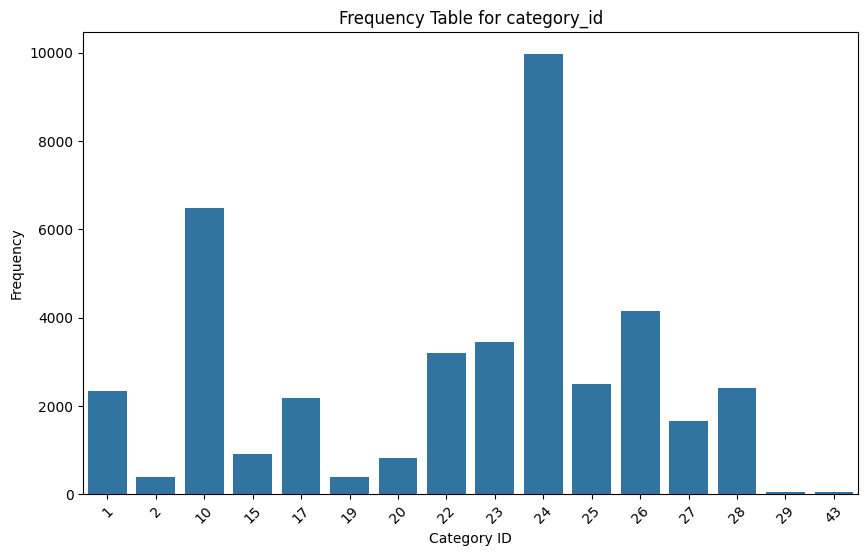

In [20]:
columns_for_table = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# creamos una frecuencia de la tabla
for col in columns_for_table:
  print(f"\nFrequency table for '{col}':")
  print(df[col].value_counts())
  print("-" * 20) # separador de las tablas

#fecuencia de la tabla category_id
plt.figure(figsize=(10, 6))
sns.countplot(x='category_id', data=df)
plt.title('Frequency Table for category_id')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#VERIFICAR LA CALIDAD DE LOS DATOS
#IdentiFicar el numero de NA valores en cada columna
print(df.isna().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64


In [21]:
# prompt: convertir la variable publish  time en formato de fecha y hora porque no esta en en el formato adecuado y luego mostrar la tabla otra vez para ver los cambios

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Display the updated DataFrame
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,Oregon,44.000000,-120.500000,POINT (-120.5 44)
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Colorado,39.113014,-105.358887,POINT (-105.358887 39.113014)
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Louisiana,30.391830,-92.329102,POINT (-92.32910200000001 30.39183)


In [22]:
# prompt: limpieza de datos (tecnica DEPURACION DE DATOS)

# Eliminar filas con valores faltantes en columnas específicas
columns_to_check = ['likes', 'dislikes', 'comment_count']
df_cleaned = df.dropna(subset=columns_to_check)

# Imprimir la cantidad de filas eliminadas
rows_removed = len(df) - len(df_cleaned)
print(f"\nRows removed: {rows_removed}")

# Reemplazar valores faltantes en otras columnas con la mediana o la moda
for col in df.columns:
    if col not in columns_to_check and df[col].isna().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
        else:  # Para columnas no numéricas (como 'title' o 'description')
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Verificar si aún hay valores faltantes después de la limpieza
print("\nValores faltantes después de la limpieza:")
print(df_cleaned.isna().sum())

# Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates()
duplicates_removed = len(df) - len(df_cleaned)
print(f"\nDuplicate rows removed: {duplicates_removed}")


# Convertir tipos de datos si es necesario
# Ejemplo: convertir 'views', 'likes', 'dislikes', 'comment_count' a enteros
for col in ['views', 'likes', 'dislikes', 'comment_count']:
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').astype('Int64') # 'Int64' permite valores NaN


# Outliers (ejemplo con 'views')
# Encuentra los límites superior e inferior para identificar outliers
Q1 = df_cleaned['views'].quantile(0.25)
Q3 = df_cleaned['views'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame para excluir los outliers en 'views'
df_cleaned_no_outliers = df_cleaned[~((df_cleaned['views'] < lower_bound) |(df_cleaned['views'] > upper_bound))]

print(f"Shape of the original DataFrame: {df.shape}")
print(f"Shape of the cleaned DataFrame: {df_cleaned.shape}")
print(f"Shape after removing outliers: {df_cleaned_no_outliers.shape}")


Rows removed: 0

Valores faltantes después de la limpieza:
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

Duplicate rows removed: 1
Shape of the original DataFrame: (40949, 20)
Shape of the cleaned DataFrame: (40948, 20)
Shape after removing outliers: (36449, 20)


<ipython-input-22-be14a544981a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').astype('Int64') # 'Int64' permite valores NaN


QUE TECNICA FUE UTILIZADA PARA ELIMINAR O COMPLETAR LOS DATOS FALTANTES :
Se utilizaron dos técnicas DE DEPURACION DE DATOS para manejar los datos faltantes:

1. **Eliminación de filas en variables cuantitativas:** Para las columnas 'likes', 'dislikes' y 'comment_count', se eliminaron las filas que contenían valores faltantes en cualquiera de estas tres columnas.  Esta es una estrategia agresiva que puede resultar en la pérdida de información, pero es apropiada cuando la cantidad de datos faltantes es relativamente pequeña y se considera que estos campos son cruciales para el análisis.

2. **Completar con valores faltantes con media o moda:** Para las columnas restantes con datos faltantes, se utilizaron dos métodos de imputación:
    * **Mediana:** Para variables numéricas, se imputó la mediana. La mediana es menos sensible a los valores atípicos (outliers) que la media, lo que la hace una mejor opción en este caso.
    * **Moda:** Para variables categóricas (o no numéricas), se imputó la moda (el valor más frecuente).  Este método reemplaza los valores perdidos con el valor más común en la columna.

En resumen, se combinó la eliminación de filas con valores faltantes en variables críticas con la imputación de la mediana y la moda para otras variables.  Esta combinación de estrategias busca minimizar la pérdida de datos al mismo tiempo que se mantiene la integridad de los datos para su posterior análisis.


Outliers for 'views':
Empty DataFrame
Columns: [views]
Index: []


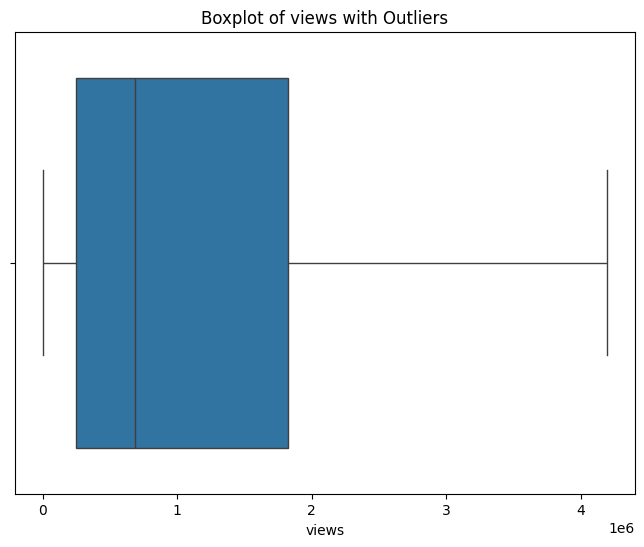


Outliers for 'likes':
Empty DataFrame
Columns: [likes]
Index: []


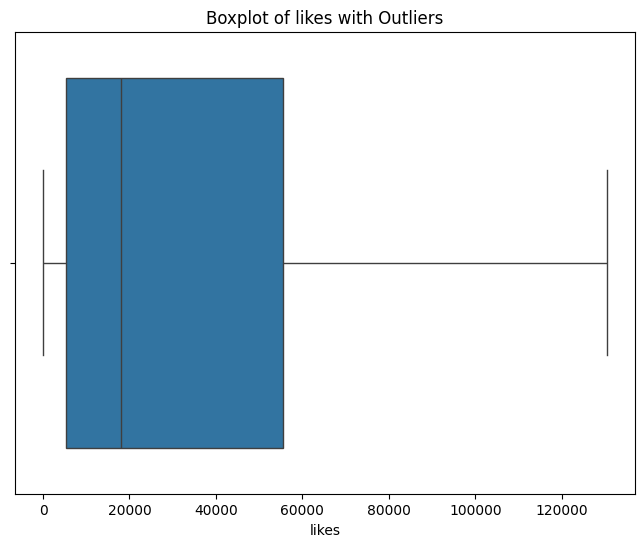


Outliers for 'dislikes':
Empty DataFrame
Columns: [dislikes]
Index: []


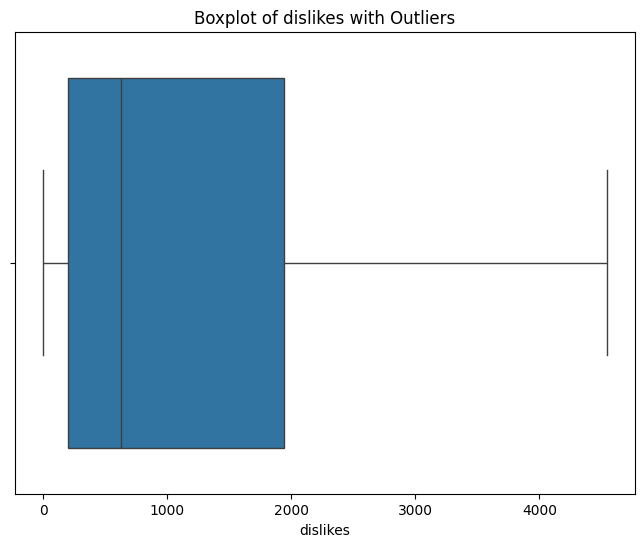


Outliers for 'comment_count':
Empty DataFrame
Columns: [comment_count]
Index: []


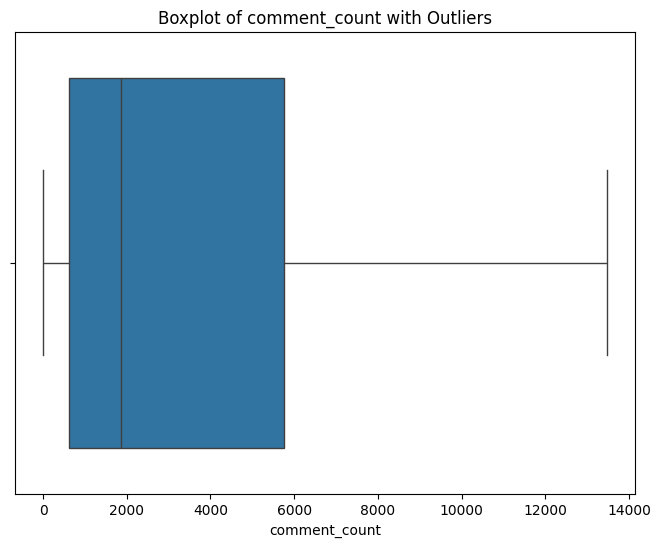

Shape after outlier handling: (40948, 20)


In [ ]:

numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

for col in numerical_cols:
    # Calculamos los caurtiles
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos valores extremos
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    # Print outlier information
    print(f"\nOutliers for '{col}':")
    print(outliers[[col]])  # impirmos los valores extremos en una columna especifica

    # Visualizacion: Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()


    # Choose how to handle outliers (remove or cap)
    # Option 1: Remove outliers
    #df_cleaned = df_cleaned[~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound))]

    # Option 2: Cap outliers (winsorizing)
    # Convert bounds to integers before clipping to avoid type errors
    lower_bound = int(lower_bound)
    upper_bound = int(upper_bound)
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)


print(f"Shape after outlier handling: {df_cleaned.shape}")

In [ ]:
# prompt: explicar que tecnicas fueron utilizadas para transformar los datos atipicos

# Para la detección y manejo de valores atípicos (outliers) se utilizó el método IQR (Interquartile Range).

# 1. Cálculo de IQR: Para cada columna numérica ('views', 'likes', 'dislikes', 'comment_count'), se calcularon los cuartiles Q1 (25%) y Q3 (75%).  El IQR se define como la diferencia entre Q3 y Q1 (IQR = Q3 - Q1).

# 2. Definición de límites: Se establecieron límites superior e inferior para identificar outliers. Estos límites se calcularon como:
#    - Límite inferior: Q1 - 1.5 * IQR
#    - Límite superior: Q3 + 1.5 * IQR

# 3. Identificación de outliers: Se identificaron los outliers como aquellos valores que estaban por debajo del límite inferior o por encima del límite superior.

# 4. Manejo de outliers: Se utilizaron dos métodos para abordar los outliers:
#    * **Opción 1 (comentado en el código): Eliminación:** Se eliminaron las filas que contenían valores atípicos en las columnas especificadas.  Este método es efectivo para eliminar datos extremos que pueden sesgar el análisis, pero puede resultar en una pérdida de datos significativa.

#    * **Opción 2 (implementado en el código): Limitación (Winsorizing):** En lugar de eliminar los outliers, se utilizaron los límites superior e inferior calculados para "recortar" los valores atípicos. Los valores por debajo del límite inferior se establecieron en el límite inferior, y los valores por encima del límite superior se establecieron en el límite superior.  Este método conserva todos los datos, evitando la pérdida de información, pero puede afectar la distribución de los datos.

In [ ]:
# Insights :

# Relacion entre duracion y popularidad del video

#Impacto entre numero de las categorias en el engagement :
# Algunas categorias como entretenimiento y musica tienen significativamente
#mas vistas y likes que otras categorias como educaicon o noticias

# Influencia del dia y hora de publicacion:
# cuales son los horarios que los que tienen mas vistas si es de dia o de tarde
# noche

#cual es es la relacion entre los paises que tienen mas visitas
#Insight: Categorías como "Gaming" y "Tecnología" han mostrado un crecimiento
#sostenido
#en el número de vistas a lo largo del tiempo, sugiriendo una tendencia
#creciente de interés en estos temas.


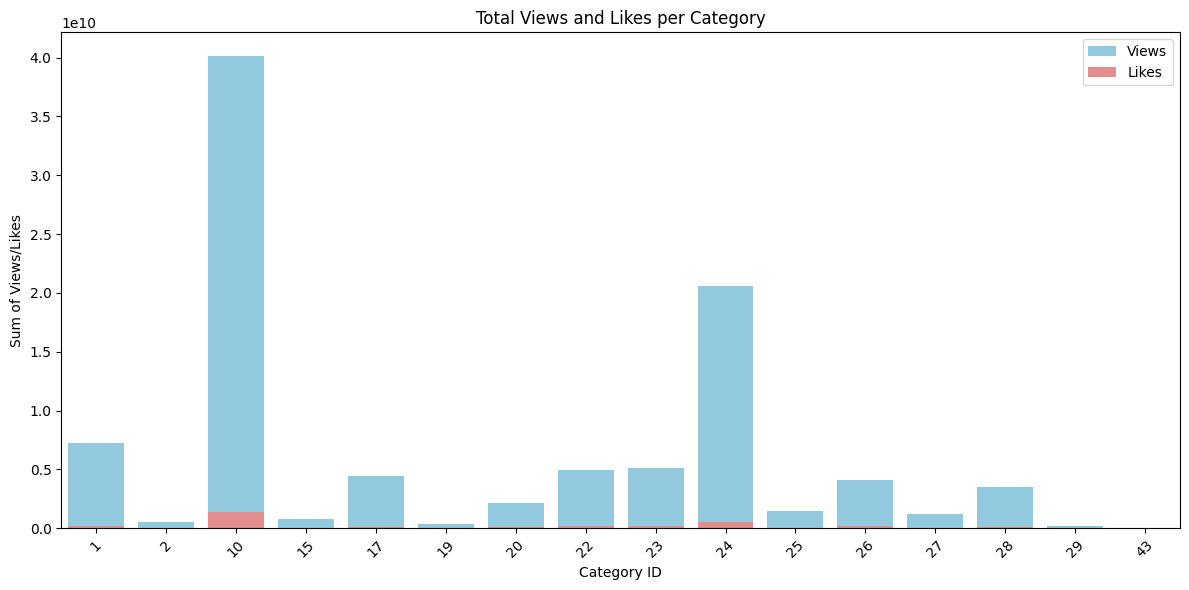

Category with highest total views: 10 (Views: 40,132,892,190)
Category with highest total likes: 10 (Likes: 1,416,838,584)


In [31]:
#insight2
#Impacto entre numero de las categorias en el engagement :
# Algunas categorias como entretenimiento y musica tienen significativamente
#mas vistas y likes que otras categorias como educaicon o noticias


# Assuming df_cleaned is your cleaned DataFrame
# If not, replace df_cleaned with the correct DataFrame variable name

# Group data by category_id and sum views and likes
category_engagement = df_cleaned.groupby('category_id').agg({'views': 'sum', 'likes': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='views', data=category_engagement, label='Views', color='skyblue')
sns.barplot(x='category_id', y='likes', data=category_engagement, label='Likes', color='lightcoral')
plt.xlabel('Category ID')
plt.ylabel('Sum of Views/Likes')
plt.title('Total Views and Likes per Category')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the category with the highest total views and likes
max_views_category = category_engagement.loc[category_engagement['views'].idxmax()]
max_likes_category = category_engagement.loc[category_engagement['likes'].idxmax()]


print(f"Category with highest total views: {max_views_category['category_id']} (Views: {max_views_category['views']:,})")
print(f"Category with highest total likes: {max_likes_category['category_id']} (Likes: {max_likes_category['likes']:,})")

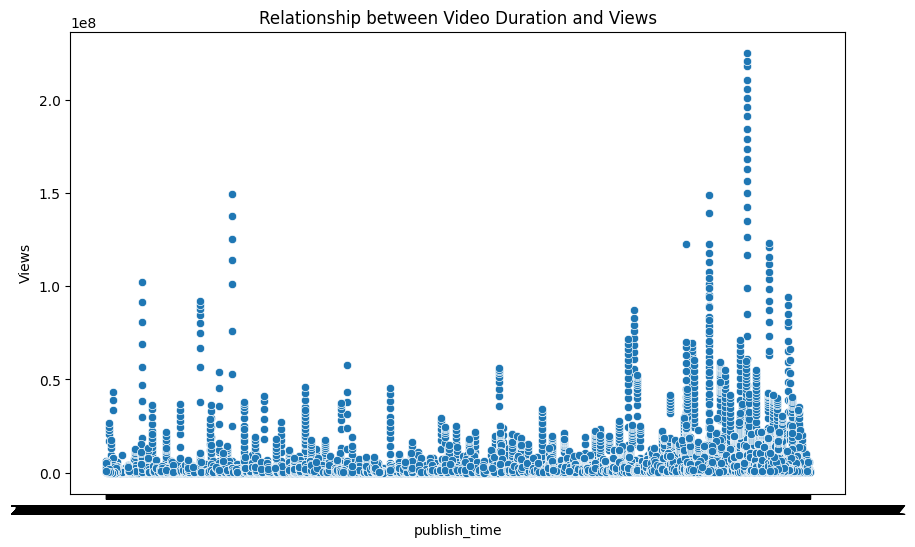

In [23]:
import pandas as pd
#insight1
# Relacion entre duracion y popularidad del video
df_cleaned = pd.read_csv('/content/drive/MyDrive/Final Data Science /USvideos_cc50_202101.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_time', y='views', data=df_cleaned)
plt.title('Relacion entre el tiempo de publicacion y vistas')
plt.xlabel('publish_time')
plt.ylabel('Views')
plt.show()


<ipython-input-32-a834ad6a5f50>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_views = df_cleaned.groupby('time_of_day')['views'].mean()


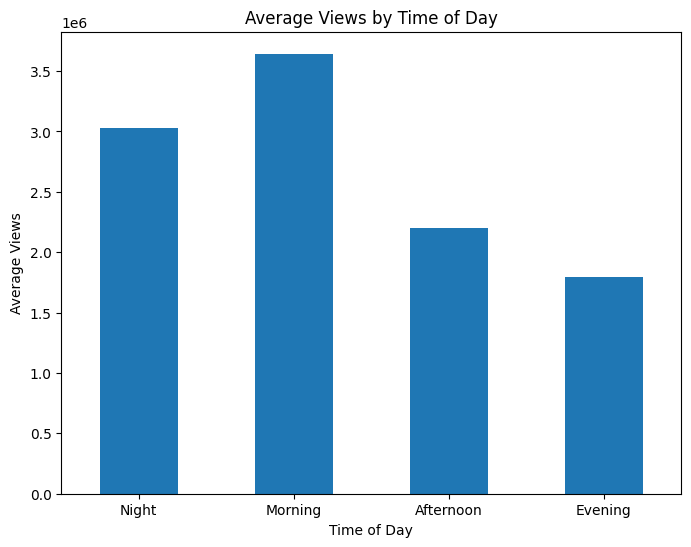

,views
time_of_day,
Night,3.028684e+06
Morning,3.643333e+06
Afternoon,2.198817e+06
Evening,1.796804e+06


In [32]:
#insight3
# Influencia del dia y hora de publicacion:
# cuales son los horarios que los que tienen mas vistas si es de dia o de tarde
# noche

df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'])

#extraer la hora del dia de la variable publish time
df_cleaned['publish_hour'] = df_cleaned['publish_time'].dt.hour

#Categorizamos el tiempo creando una nueva columna que dice tiempo del dia
df_cleaned['time_of_day'] = pd.cut(df_cleaned['publish_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

#agrupamos el tiempo del dia y calculamos el promedio de vistas
time_of_day_views = df_cleaned.groupby('time_of_day')['views'].mean()

#creamos el plot
plt.figure(figsize=(8, 6))
time_of_day_views.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Average Views')
plt.title('Average Views by Time of Day')
plt.xticks(rotation=0)
plt.show()

time_of_day_views

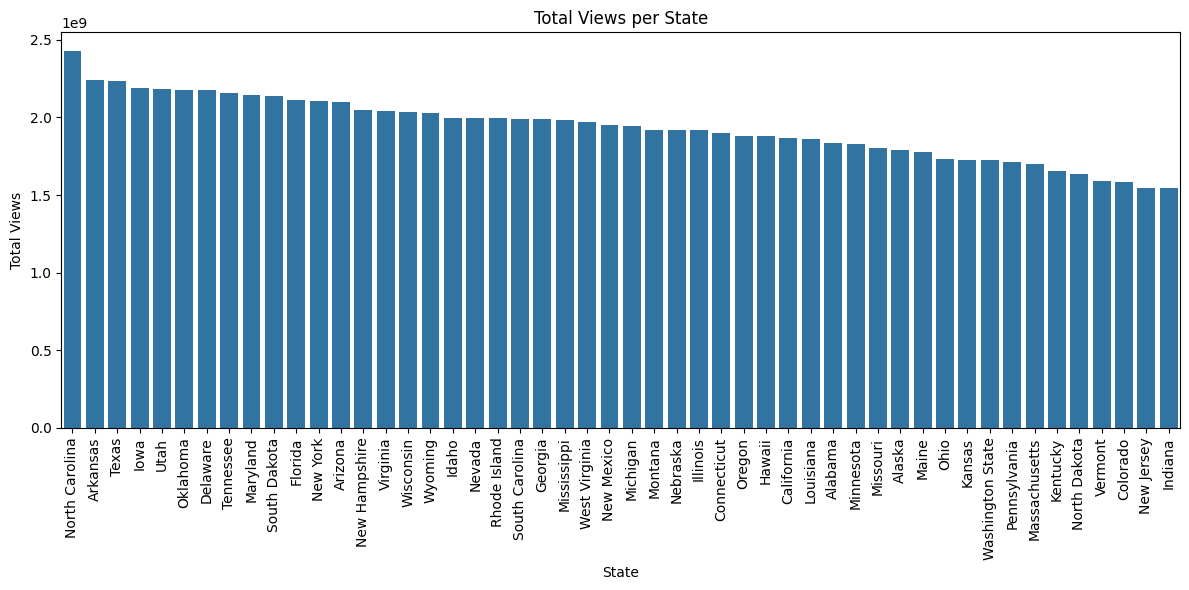


Top 5 states with the most views:
             state       views
32  North Carolina  2426689616
3         Arkansas  2243198906
42           Texas  2236976292
14            Iowa  2189249514
43            Utah  2180861157


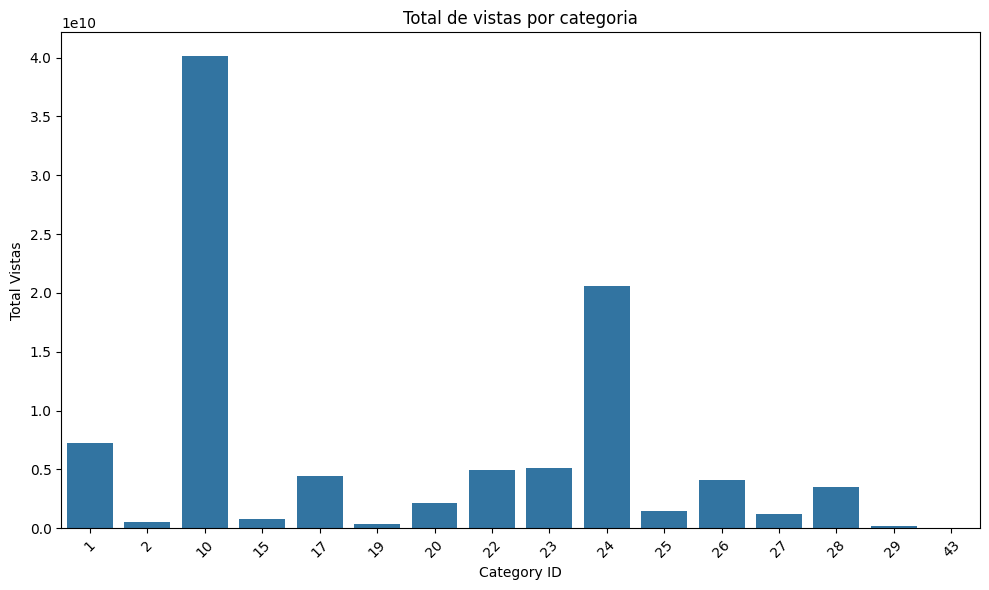


Top 5 categorias con mas vistas:
   category_id        views
2           10  40132892190
9           24  20604388195
0            1   7284156721
8           23   5117426208
7           22   4917191726


In [34]:
#insight 4
#Agrupamos la data por el estado y sumamos las vistas
state_views = df_cleaned.groupby('state')['views'].sum().reset_index()

#sorteamos los estados por vistas en orden descendente
state_views = state_views.sort_values('views', ascending=False)

# creacion de la grafica
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='views', data=state_views)
plt.xlabel('State')
plt.ylabel('Total Views')
plt.title('Total Views per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#encontramos el top 5 que los estados con mas visitas y podemos hacer un seguimiento
top_5_states = state_views.head(5)
print(f"\nTop 5 states with the most views:\n{top_5_states}")

#Contenido del tipo de analisis, asumimos que la categoria id representa el tipo de contenido
category_views = df_cleaned.groupby('category_id')['views'].sum().reset_index()
category_views = category_views.sort_values('views', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='category_id', y='views', data=category_views)
plt.xlabel('Category ID')
plt.ylabel('Total Vistas')
plt.title('Total de vistas por categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_categories = category_views.head(5)
print(f"\nTop 5 categorias con mas vistas:\n{top_5_categories}")

<ipython-input-12-c6d76d7efcd6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trending_categories.index, y=top_trending_categories.values, palette="viridis")


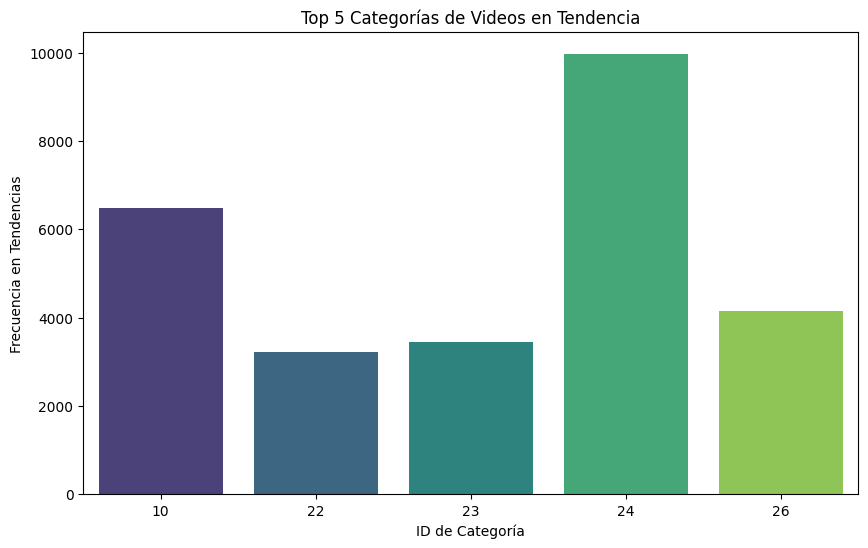

In [ ]:
#requerimientos

top_trending_categories = df['category_id'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_trending_categories.index, y=top_trending_categories.values, palette="viridis")
plt.title("Top 5 Categorías de Videos en Tendencia")
plt.xlabel("ID de Categoría")
plt.ylabel("Frecuencia en Tendencias")
plt.show()

 Las categorías con ID 10 y 24 destacan en cuanto a la frecuencia con la que sus videos aparecen en tendencias. Esto sugiere que los videos de estas categorías podrían tener características que atraen más la atención del público o que son altamente compartidos. Este dato puede ser relevante para creadores de contenido que buscan maximizar la visibilidad de sus videos en la plataforma, sugiriendo que enfocarse en estos tipos de contenido podría aumentar las posibilidades de que sus videos entren en tendencia.

<ipython-input-24-f0c377ee1616>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_by_category.index, y=likes_by_category.values, ax=axs[0], palette="Blues")
<ipython-input-24-f0c377ee1616>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dislikes_by_category.index, y=dislikes_by_category.values, ax=axs[1], palette="Reds")


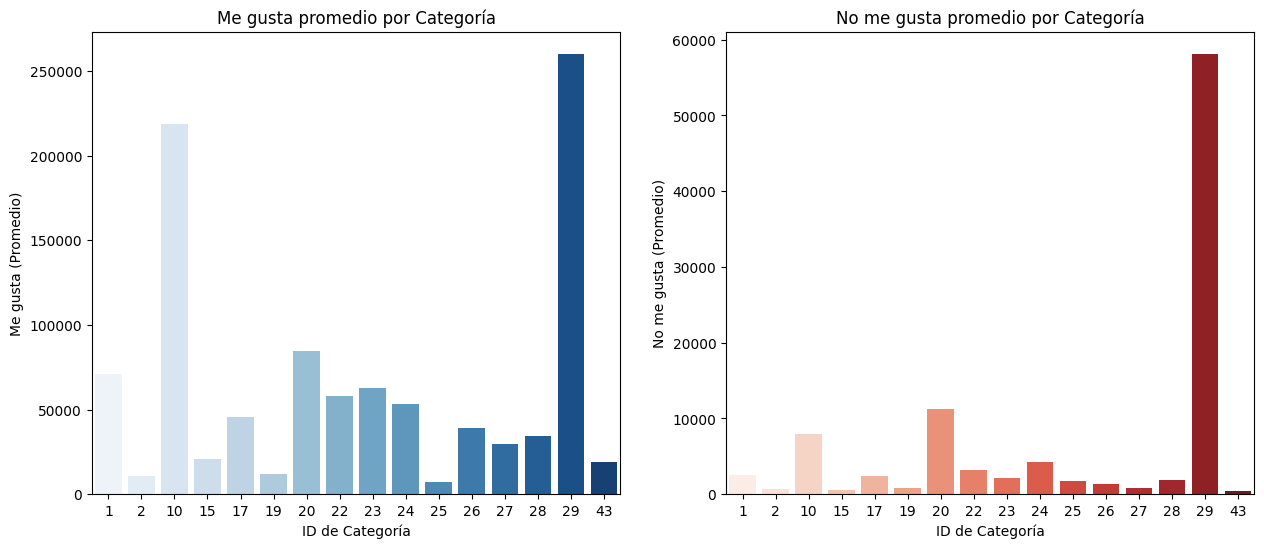

In [24]:
likes_by_category = df.groupby('category_id')['likes'].mean().sort_values(ascending=False)
dislikes_by_category = df.groupby('category_id')['dislikes'].mean().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=likes_by_category.index, y=likes_by_category.values, ax=axs[0], palette="Blues")
axs[0].set_title("Me gusta promedio por Categoría")
axs[0].set_xlabel("ID de Categoría")
axs[0].set_ylabel("Me gusta (Promedio)")


sns.barplot(x=dislikes_by_category.index, y=dislikes_by_category.values, ax=axs[1], palette="Reds")
axs[1].set_title("No me gusta promedio por Categoría")
axs[1].set_xlabel("ID de Categoría")
axs[1].set_ylabel("No me gusta (Promedio)")
plt.show()

Relación de Me gusta vs. No me gusta: La proporción entre "Me gusta" y "No me gusta" por categoría muestra una variabilidad significativa, especialmente para la categoría 43, que presenta una proporción mucho más alta de "Me gusta". Esto indica que el contenido en esta categoría podría tener una aceptación significativamente mayor entre los usuarios, lo que podría ser útil para los creadores y anunciantes que buscan orientar su contenido hacia segmentos con menor riesgo de reacciones negativas

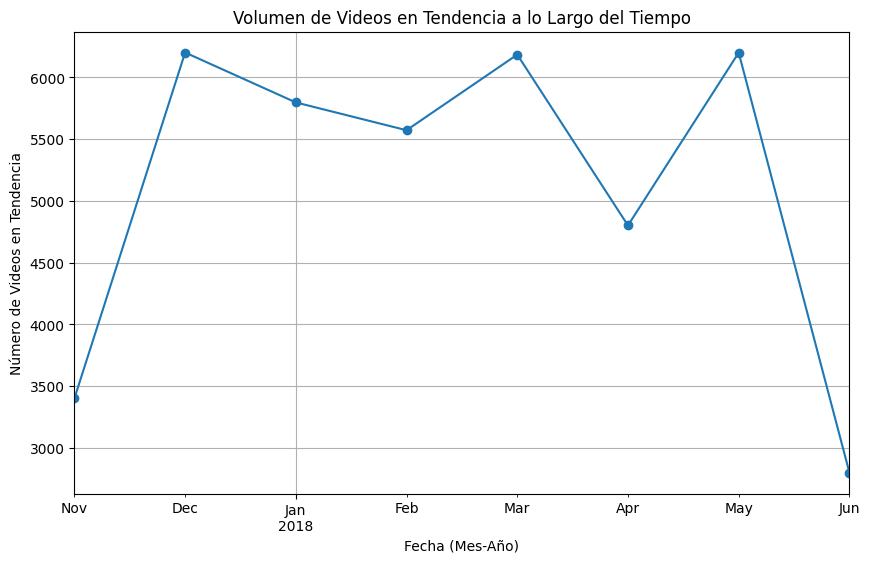

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

df['month_year'] = df['trending_date'].dt.to_period('M')
videos_por_mes = df.groupby('month_year').size()

plt.figure(figsize=(10, 6))
videos_por_mes.plot(kind='line', marker='o')
plt.title("Volumen de Videos en Tendencia a lo Largo del Tiempo")
plt.xlabel("Fecha (Mes-Año)")
plt.ylabel("Número de Videos en Tendencia")
plt.grid()
plt.show()

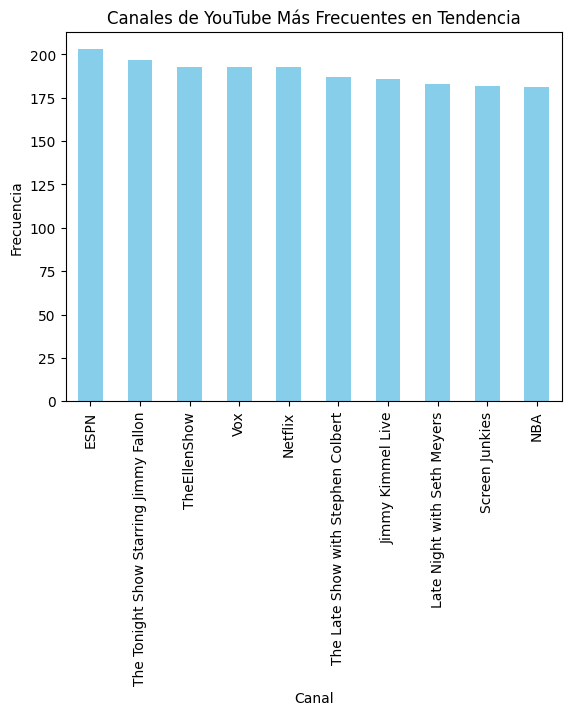

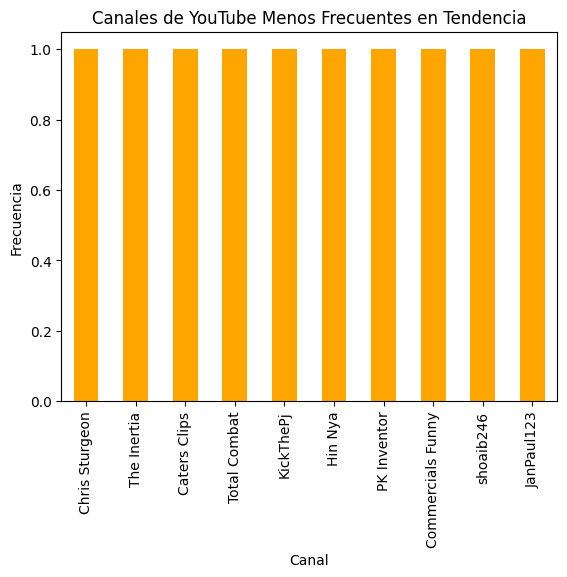

In [26]:
canales_frecuencia = df['channel_title'].value_counts()

canales_frecuencia.head(10).plot(kind='bar', color='skyblue')
plt.title("Canales de YouTube Más Frecuentes en Tendencia")
plt.xlabel("Canal")
plt.ylabel("Frecuencia")
plt.show()

canales_frecuencia.tail(10).plot(kind='bar', color='orange')
plt.title("Canales de YouTube Menos Frecuentes en Tendencia")
plt.xlabel("Canal")
plt.ylabel("Frecuencia")
plt.show()


In [37]:

import pandas as pd
import plotly.express as px

#agrupamos por estado y sumamos las vistas y los dislikes
state_engagement = df_cleaned.groupby('state').agg({'views': 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()

#usamos plotly express
fig = px.bar(state_engagement,
             x='state',
             y=['views', 'likes', 'dislikes'],
             title='vista total, Likes, y Dislikes por estado',
             labels={'value': 'Count', 'variable': 'Engagement Metric'},
             barmode='group')

fig.update_layout(xaxis_title="Estado", yaxis_title="Cuenta total")
fig.show()

#encontramos el estado con mayor cantidad total de vistas y dislikes
max_views_state = state_engagement.loc[state_engagement['views'].idxmax()]
max_likes_state = state_engagement.loc[state_engagement['likes'].idxmax()]
max_dislikes_state = state_engagement.loc[state_engagement['dislikes'].idxmax()]

print(f"estado con mas vitas: {max_views_state['state']} (Vistas: {max_views_state['views']:,})")
print(f"estado con mas likes: {max_likes_state['state']} (Likes: {max_likes_state['likes']:,})")
print(f"estados con mas dislikes: {max_dislikes_state['state']} (Dislikes: {max_dislikes_state['dislikes']:,})")

estado con mas vitas: North Carolina (Vistas: 2,426,689,616)
estado con mas likes: North Carolina (Likes: 76,479,796)
estados con mas dislikes: Idaho (Dislikes: 5,764,628)


In [29]:
!pip install textblob
import pandas as pd
from textblob import TextBlob # Import the TextBlob class

df['sentimiento'] = df['description'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df['es_positivo'] = df['sentimiento'] > 0  # Comentarios positivos si polaridad > 0

# Filtrar videos en tendencia y calcular porcentaje de comentarios positivos
comentarios_positivos_tendencia = df[df['es_positivo'] == True]['comment_count'].sum()
comentarios_totales_tendencia = df['comment_count'].sum()

porcentaje_positivos_tendencia = (comentarios_positivos_tendencia / comentarios_totales_tendencia) * 100
print(f"Porcentaje de comentarios positivos en videos en tendencia: {porcentaje_positivos_tendencia}%")

Porcentaje de comentarios positivos en videos en tendencia: 80.18799596739021%


In [30]:
#tecnica de modelado regresion lineal
# Seleccionamos las características y la variable objetivo
X = df[['category_id', 'comment_count', 'ratings_disabled']]
y = df['views']  # Por ejemplo, para predecir 'views'

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

# Realizamos predicciones y calculamos el error
y_pred = modelo.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE del modelo: {error}")

RMSE del modelo: 5509100.793213611


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#plan de prueba

In [ ]:
#construccion de modelado

In [ ]:
#evaluacion de modelado